In [1]:
#by Terry Zhang in Mystic coders

In [2]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
year1 = pd.read_csv('compare_year_1.csv', low_memory=False)
year2 = pd.read_csv('compare_year_2.csv', low_memory=False)
pd.set_option('display.float_format', lambda x:'%f'%x)

In [4]:
year1['DY'] = pd.to_numeric(year1['DY'])
year2['DY'] = pd.to_numeric(year2['DY'])
year1['MO'] = pd.to_numeric(year1['MO'])
year2['MO'] = pd.to_numeric(year2['MO'])
year1['ALLSKY_SFC_SW_DWN'] = pd.to_numeric(year1['ALLSKY_SFC_SW_DWN'])
year2['ALLSKY_SFC_SW_DWN'] = pd.to_numeric(year2['ALLSKY_SFC_SW_DWN'])
year1['ALLSKY_NKT'] = pd.to_numeric(year1['ALLSKY_NKT'])
year2['ALLSKY_NKT'] = pd.to_numeric(year2['ALLSKY_NKT'])

In [5]:
sub1 = year1[['DY', 'MO', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_NKT']].replace(-999, np.nan)
sub2 = year2[['DY', 'MO', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_NKT']].replace(-999, np.nan)
sub1 = sub1.dropna(subset=['ALLSKY_SFC_SW_DWN'])
sub2 = sub2.dropna(subset=['ALLSKY_SFC_SW_DWN'])

In [6]:
sub2 = sub2.rename(columns={"ALLSKY_SFC_SW_DWN": "ALLSKY_SFC_SW_DWN_2", "ALLSKY_NKT": "ALLSKY_NKT_2"})

In [7]:
g1 = sub1.groupby(pd.Index(sub1['MO']))['ALLSKY_NKT'].mean()
g2 = sub1.groupby(pd.Index(sub1['MO']))['ALLSKY_SFC_SW_DWN'].mean()
g3 = sub2.groupby(pd.Index(sub2['MO']))['ALLSKY_NKT_2'].mean()
g4 = sub2.groupby(pd.Index(sub2['MO']))['ALLSKY_SFC_SW_DWN_2'].mean()

In [8]:
sub3 = pd.concat([g1,g3], axis=1)
sub4 = pd.concat([g2,g4], axis=1)

In [9]:
year1_name = year1.loc[1, 'YEAR']
year2_name = year2.loc[1, 'YEAR']

Text(0.5, 1.0, 'Box Plot for All Sky Surface Shortwave Downward Irradiance in kW-hr/m^2/day for year 2020')

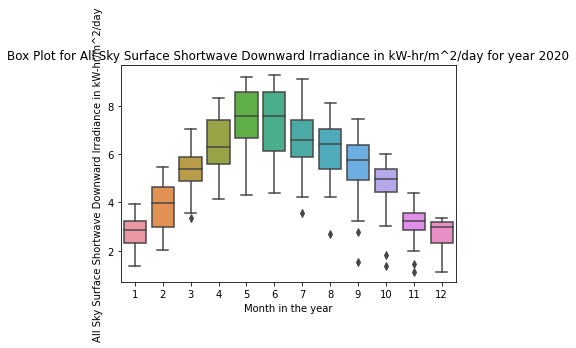

In [10]:
%matplotlib inline
sns.boxplot(data = sub1, x='MO',y='ALLSKY_SFC_SW_DWN')
plt.xlabel('Month in the year')
plt.ylabel('All Sky Surface Shortwave Downward Irradiance in kW-hr/m^2/day')
plt.title(f'Box Plot for All Sky Surface Shortwave Downward Irradiance in kW-hr/m^2/day for year {year1_name}')

Text(0.5, 1.0, 'Box Plot for All Sky Surface Shortwave Downward Irradiance in kW-hr/m^2/day for year 2019')

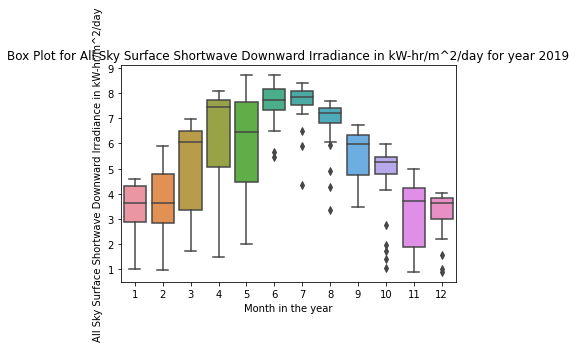

In [11]:
%matplotlib inline
sns.boxplot(data = sub2, x='MO',y='ALLSKY_SFC_SW_DWN_2')
plt.xlabel('Month in the year')
plt.ylabel('All Sky Surface Shortwave Downward Irradiance in kW-hr/m^2/day')
plt.title(f'Box Plot for All Sky Surface Shortwave Downward Irradiance in kW-hr/m^2/day for year {year2_name}')

Text(0.5, 1.0, 'Line Plot for comparsion of solar irradiance')

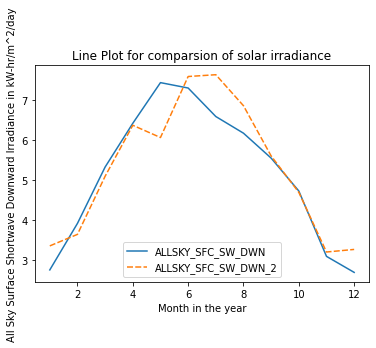

In [12]:
%matplotlib inline
sns.lineplot(data = sub4)
plt.xlabel('Month in the year')
plt.ylabel('All Sky Surface Shortwave Downward Irradiance in kW-hr/m^2/day')
plt.title('Line Plot for comparsion of solar irradiance')

In [13]:
radiance_mean = sub1['ALLSKY_SFC_SW_DWN'].mean()
radiance_max = sub1['ALLSKY_SFC_SW_DWN'].max()
radiance_min = sub1['ALLSKY_SFC_SW_DWN'].min()
cloudclearness_mean = sub1['ALLSKY_NKT'].mean()
cloudclearness_max = sub1['ALLSKY_NKT'].max()
cloudclearness_min = sub1['ALLSKY_NKT'].min()

Text(0.5, 1.0, 'Box Plot for All Sky Normalized Insolation Clearness Index for year 2020')

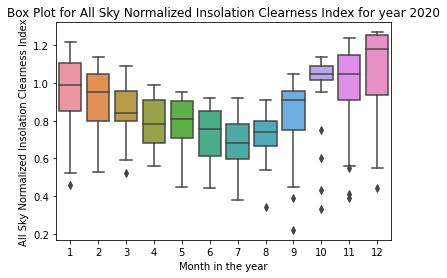

In [14]:
%matplotlib inline
sns.boxplot(data = sub1, x='MO',y='ALLSKY_NKT')
plt.xlabel('Month in the year')
plt.ylabel('All Sky Normalized Insolation Clearness Index')
plt.title(f'Box Plot for All Sky Normalized Insolation Clearness Index for year {year1_name}')

Text(0.5, 1.0, 'Box Plot for All Sky Normalized Insolation Clearness Index for year 2019')

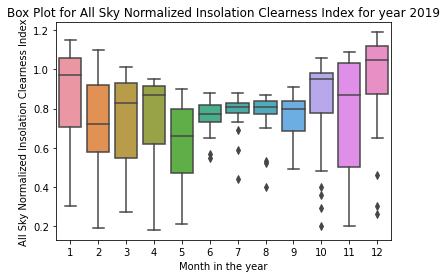

In [15]:
%matplotlib inline
sns.boxplot(data = sub2, x='MO',y='ALLSKY_NKT_2')
plt.xlabel('Month in the year')
plt.ylabel('All Sky Normalized Insolation Clearness Index')
plt.title(f'Box Plot for All Sky Normalized Insolation Clearness Index for year {year2_name}')

Text(0.5, 1.0, 'Line Plot for comparsion of All Sky Normalized Insolation Clearness Index')

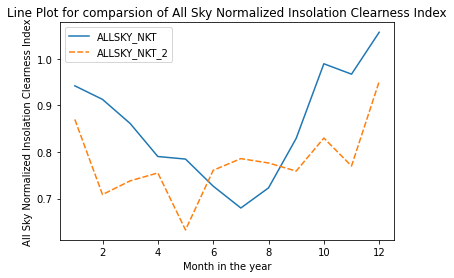

In [16]:
%matplotlib inline
sns.lineplot(data = sub3)
plt.xlabel('Month in the year')
plt.ylabel('All Sky Normalized Insolation Clearness Index')
plt.title('Line Plot for comparsion of All Sky Normalized Insolation Clearness Index')

In [17]:
radiance_mean_2 = sub2['ALLSKY_SFC_SW_DWN_2'].mean()
radiance_max_2 = sub2['ALLSKY_SFC_SW_DWN_2'].max()
radiance_min_2 = sub2['ALLSKY_SFC_SW_DWN_2'].min()
cloudclearness_mean_2 = sub2['ALLSKY_NKT_2'].mean()
cloudclearness_max_2 = sub2['ALLSKY_NKT_2'].max()
cloudclearness_min_2 = sub2['ALLSKY_NKT_2'].min()

In [18]:
print(f'For year {year1_name}:')
print(f'The mean of All Sky Surface Shortwave Downward Irradiance in the year is {radiance_mean:.2f} kW-hr/m^2/day')
print(f'The maxmium of All Sky Surface Shortwave Downward Irradiance in the year is {radiance_max:.2f} kW-hr/m^2/day')
print(f'The minimum of All Sky Surface Shortwave Downward Irradiance in the year is {radiance_min:.2f} kW-hr/m^2/day')
print(f'The mean of All Sky Insolation Clearness Index in the year is {cloudclearness_mean*100:.2f} %')
print(f'The maxmium of All Sky Insolation Clearness Index in the year is {cloudclearness_max*100:.2f} %')
print(f'The minimum of All Sky Insolation Clearness Index in the year is {cloudclearness_min*100:.2f} %')

For year 2020:
The mean of All Sky Surface Shortwave Downward Irradiance in the year is 5.17 kW-hr/m^2/day
The maxmium of All Sky Surface Shortwave Downward Irradiance in the year is 9.29 kW-hr/m^2/day
The minimum of All Sky Surface Shortwave Downward Irradiance in the year is 1.10 kW-hr/m^2/day
The mean of All Sky Insolation Clearness Index in the year is 85.54 %
The maxmium of All Sky Insolation Clearness Index in the year is 127.00 %
The minimum of All Sky Insolation Clearness Index in the year is 22.00 %


In [19]:
print(f'For year {year2_name}:')
print(f'The mean of kilowatt per day of your solar panels in the year is {radiance_mean_2:.2f} kW-day')
print(f'The maxmium of kilowatt per day of your solar panels in the year is {radiance_max_2:.2f} kW-day')
print(f'The minimum of kilowatt per day of your solar panels in the year is {radiance_min_2:.2f} kW-day')
print(f'The mean of All Sky Insolation Clearness Index in the year is {cloudclearness_mean_2*100:.2f} %')
print(f'The maxmium of All Sky Insolation Clearness Index in the year is {cloudclearness_max_2*100:.2f} %')
print(f'The minimum of All Sky Insolation Clearness Index in the year is {cloudclearness_min_2*100:.2f} %')

For year 2019:
The mean of kilowatt per day of your solar panels in the year is 5.29 kW-day
The maxmium of kilowatt per day of your solar panels in the year is 8.73 kW-day
The minimum of kilowatt per day of your solar panels in the year is 0.88 kW-day
The mean of All Sky Insolation Clearness Index in the year is 77.89 %
The maxmium of All Sky Insolation Clearness Index in the year is 119.00 %
The minimum of All Sky Insolation Clearness Index in the year is 18.00 %
